# SFR vs other quantities
---------------------------------------

We want to understand how the dynamics of the clusters impact on the star formation rate. In particular, how the infall population changes over time. 

In [2]:
import sys
sys.path.append('/Users/jesteves/Documents/GitHub/galaxyFormation/scripts/')


from file_loc import FileLocs
from utils import gaussian_kde

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii as at

In [4]:
pop='tng'

# Reading Initial Data

In [18]:
galaxy_file = '../data/TNG300-1_GalEvol_z0p10_post.csv'

In [19]:
print('--------Initial Files-------')
print('Galaxy File : %s'%galaxy_file)
print()

--------Initial Files-------
Galaxy File : ../data/TNG300-1_GalEvol_z0p10_post.csv



In [20]:
# load catalogs
gal0= at.read(galaxy_file)

In [21]:
gal0

HostHaloID,R,vlos,mass,mass_bulge,BT,age,t_cross,t_infall,M200,R200,Rn,vlosn,infall,orbital,interloper,pinfall,porbital,pinterloper,ssfr,log_sfr,SF
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,int64
0,0.0,97.26800537109375,12.807409286499023,12.549362814638968,0.6643368435642611,10.126032957962474,0.0,--,0.015138044357299804,2.269838134765625,0.0,0.06027122351608081,0,1,0,0.23,0.77,0.0,-12.5,-11.0,0
0,2.66918612326038,-59.31558965455139,12.550010681152344,12.262298893113561,0.6890437069227345,9.445555743605391,44000395927.920044,--,0.015138044357299804,2.269838134765625,1.1759367694013962,-0.03675435872688336,1,0,1,0.28,0.03,0.69,-13.228442395887754,-0.678431714735411,0
0,0.4307238334287162,1648.6933739463502,11.965728759765625,11.763254646769985,0.8388035594202955,10.046613865860719,255449812.96963707,0.13692906918792058,0.015138044357299804,2.269838134765625,0.1897597131846545,1.0215976617541747,1,1,0,0.09,0.91,0.0,-12.5,-11.0,0
0,1.8283343809539045,-109.959971106864,11.538189888000488,11.306994501429326,0.7547409297760412,9.81646366935296,16258017515.979824,--,0.015138044357299804,2.269838134765625,0.8054910845625967,-0.06813568316856979,0,1,0,0.16,0.82,0.02,-12.5,-11.0,0
0,1.5876295576939248,151.26342604219357,11.546501159667969,11.401548191180332,0.895530789047599,9.618550818848373,10262704429.161537,2.200451156828324,0.015138044357299804,2.269838134765625,0.6994461558193257,0.09372898854063025,0,1,0,0.41,0.56,0.03,-12.5,-11.0,0
0,0.09810011349339393,92.44753952632745,11.926732063293457,11.750875885781408,0.7938871210381263,10.790838002650544,1037577943.2343771,4.298360295288629,0.015138044357299804,2.269838134765625,0.043218990812982964,0.05728426626047449,0,1,0,0.0,1.0,0.0,-12.5,-11.0,0
0,2.4905729032255004,450.020737646827,11.491525650024414,11.24269424126622,0.6841681363692542,9.549768351791249,5411445759.214323,--,0.015138044357299804,2.269838134765625,1.0972469204208994,0.27885120458781415,1,0,0,0.32,0.13,0.55,-12.5,-11.0,0
0,2.640298323938205,-250.83137520139576,11.259239196777344,10.880579484536176,0.49737504493197604,8.486857065873485,10292425187.959274,--,0.015138044357299804,2.269838134765625,1.1632099591149183,-0.15542535103842087,0,0,0,0.31,0.62,0.07,-12.5,-11.0,0
0,2.7949225863683744,-953.6224541390425,11.512514114379883,11.225944610285291,0.6395124624696044,8.572929491468269,2865760504.365831,--,0.015138044357299804,2.269838134765625,1.2313312317562979,-0.5909033691406255,1,0,0,0.66,0.18,0.16,-12.5,-11.0,0


# Mask Data
---------------------

In [22]:
mask = np.abs(gal0['vlosn'])<3.
mask&= gal0['ssfr']>-20

Nsize = np.count_nonzero(mask)

print('Masking Galaxies')
print('New Size: %i'%(Nsize))
print('fraction: %.2f'%(1.*Nsize/len(gal0)))

Masking Galaxies
New Size: 45848
fraction: 0.63


In [23]:
gal = gal0[mask].copy()

# Phase Space Analysis
---------------------------------------


In [42]:
mass = np.array(gal['mass'])
sfr  = np.array(gal['log_sfr'])

rn = np.array(gal['Rn'])
t_infall = np.array(gal['t_cross'])/1e9

ssfr = np.array(gal['ssfr'])
Pi   = np.array(gal['pinfall'])
Po   = np.array(gal['porbital'])
Pn   = np.array(gal['pinterloper'])

In [43]:
from utils import check_non_valid_number
Ps0   = check_non_valid_number(gal['BT'])
Ps0[np.isnan(Ps0)] = 0.

## Stellar Mass

In [44]:
stellar_mass_label = r'Log($M_{\star}/M_{\odot}$) ' 
sfr_label = r'SFR [$ M_{\star} / yr$]'
ssfr_label= r'sSFR [yr$^{-1}$]'

In [45]:
import pandas as pd
import seaborn as sns

In [46]:
def get_kde(xy,weights=None):
    pdf = gaussian_kde(xy, weights=weights)
    pdf.set_bandwidth(bw_method=pdf.factor / 1.)  # kde bandwidth
    zz2 = pdf((np.ravel(xx), np.ravel(yy)))
    zz2 = np.reshape(zz2, xx.shape)
    return zz2

In [47]:
# grid
xmin, xmax = 10., 12.0
ymin, ymax = -4.2, 1.0
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRmass(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    if title is not None:
        ax.set_title(title,fontsize=22)

In [48]:
sfr = np.where(sfr<-5,-4.,sfr)

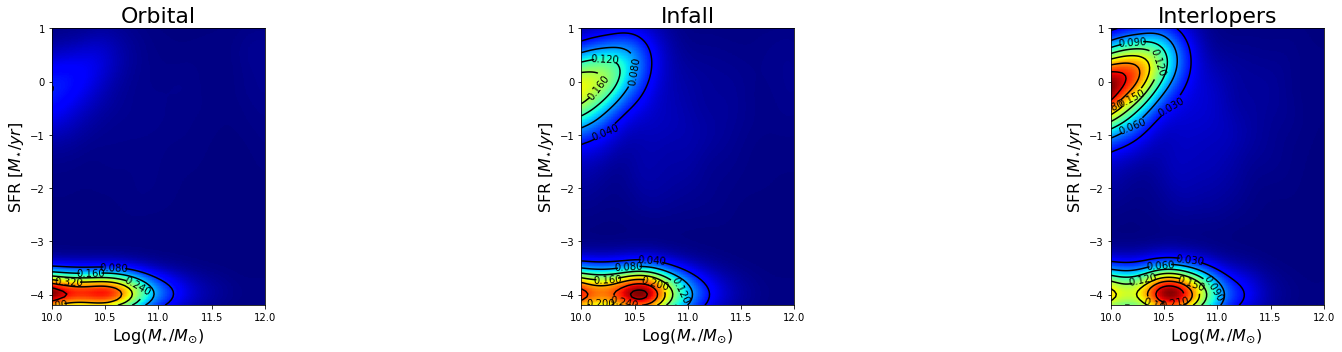

In [50]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRmass(mass,sfr,Po,ax=axis[0],title='Orbital')
SFRmass(mass,sfr,Pi,ax=axis[1],title='Infall')
SFRmass(mass,sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig(f'../plots/{pop}_sfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

(array([13227.68,     0.  ,    35.53,    91.11,   249.52,   895.56,
         1081.28,   682.22,   227.44,    25.28]),
 array([-4.        , -3.43276087, -2.86552174, -2.29828262, -1.73104349,
        -1.16380436, -0.59656523, -0.02932611,  0.53791302,  1.10515215,
         1.67239128]),
 <BarContainer object of 10 artists>)

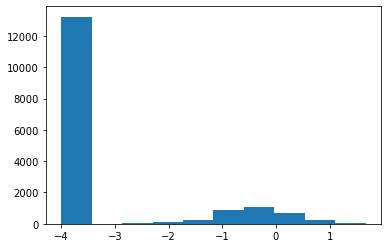

In [49]:
plt.hist(sfr,weights=Po)

## Radii

In [22]:
radii_label = r'$ R / R_{200}$'

In [23]:
# grid
xmin, xmax = 0., 3.
ymin, ymax = -2.5, 1.0
x = np.linspace(xmin, xmax, 120)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRradii(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(radii_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    if title is not None:
        ax.set_title(title,fontsize=22)

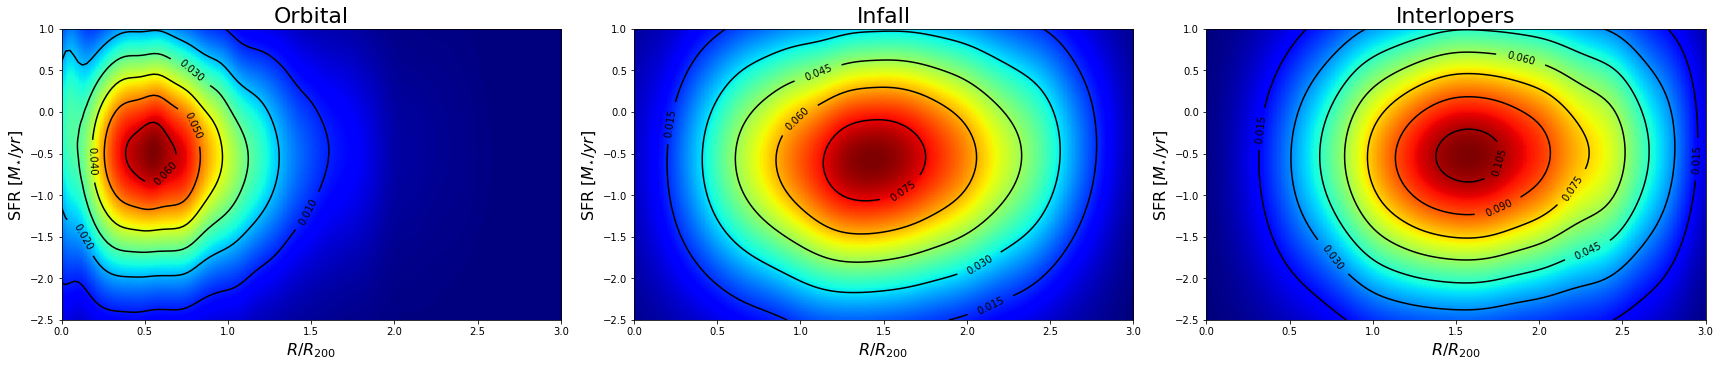

In [24]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRradii(rn,sfr,Po,ax=axis[0],title='Orbital')
SFRradii(rn,sfr,Pi,ax=axis[1],title='Infall')
SFRradii(rn,sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig(f'../plots/{pop}_sfr_radii_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

# sSFR

In [25]:
# grid
xmin, xmax = 9., 12.0
ymin, ymax = -13.25, -8.75
x = np.linspace(xmin, xmax, 100)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRmass(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(stellar_mass_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.axhline(-11.0,ls='--',lw=3,color='white')
    if title is not None:
        ax.set_title(title,fontsize=22)

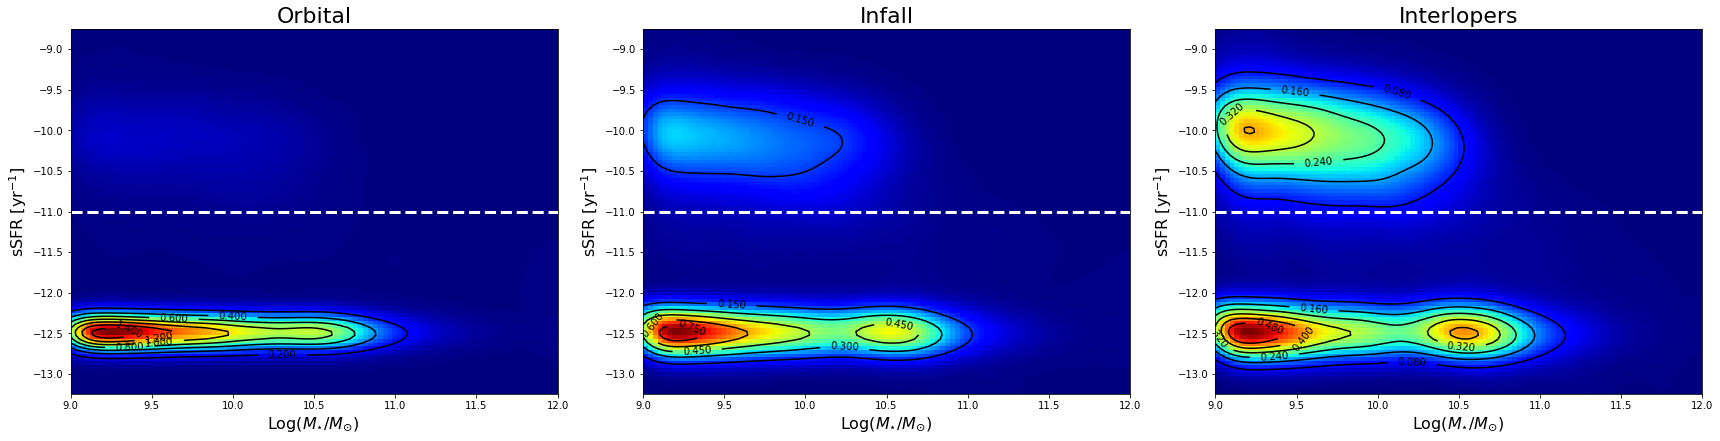

In [26]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRmass(mass,ssfr,Po,ax=axis[0],title='Orbital')
sSFRmass(mass,ssfr,Pi,ax=axis[1],title='Infall')
sSFRmass(mass,ssfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig(f'../plots/{pop}_sfr_mass_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

## Radii

In [29]:
radii_label = r'$ R / R_{200}$'

In [30]:
# grid
xmin, xmax = 0., 3.
ymin, ymax = -13.25, -8.75
x = np.linspace(xmin, xmax, 120)  # kde resolution
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRradii(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    #cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(radii_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    ax.axhline(-11.0,ls='--',lw=3,color='white')
    if title is not None:
        ax.set_title(title,fontsize=22)

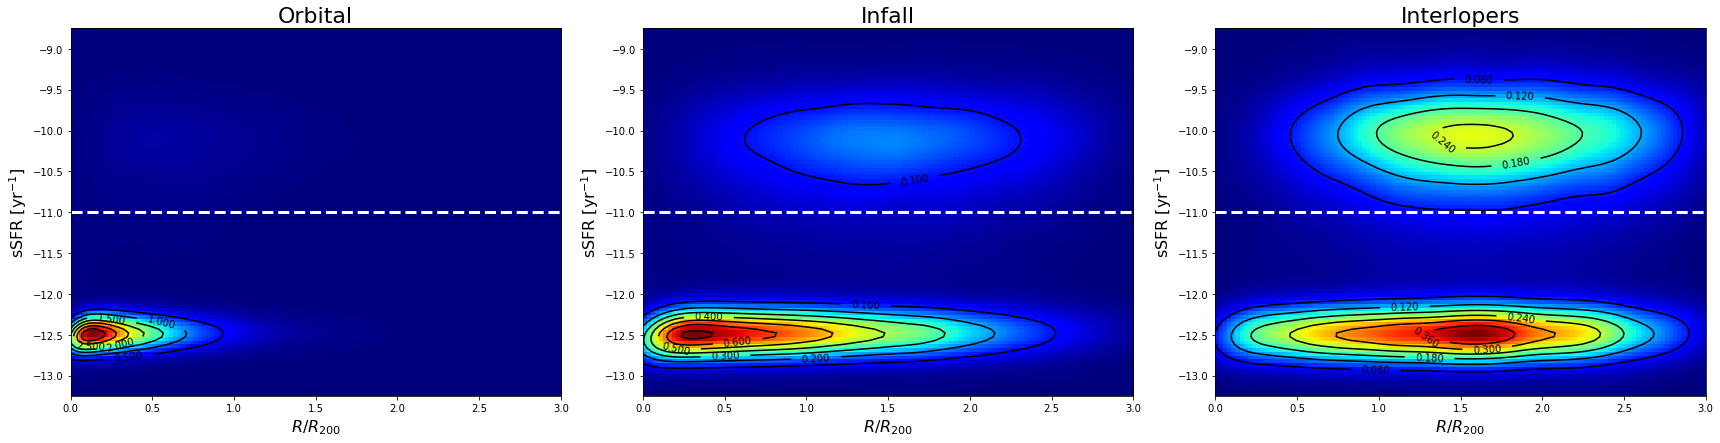

In [31]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Po,ax=axis[0],title='Orbital')
sSFRradii(rn,ssfr,Pi,ax=axis[1],title='Infall')
sSFRradii(rn,ssfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig(f'../plots/{pop}_ssfr_radii_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

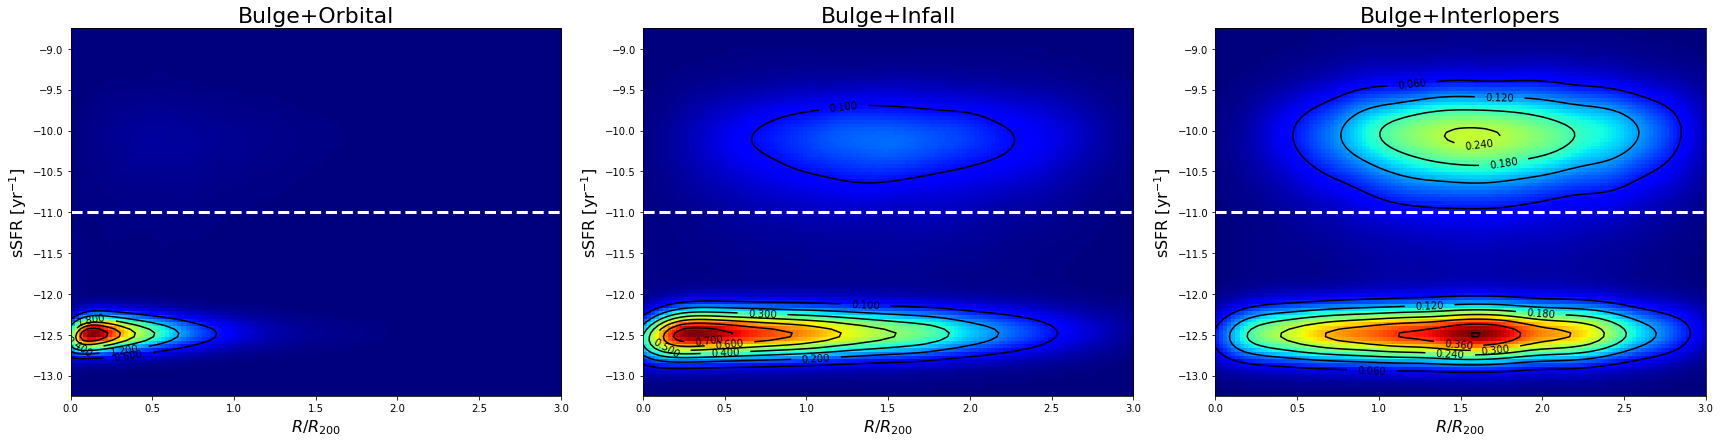

In [32]:
fig, axis = plt.subplots(1, 3, figsize=(24,6))
sSFRradii(rn,ssfr,Ps0*Po,ax=axis[0],title='Bulge+Orbital')
sSFRradii(rn,ssfr,Ps0*Pi,ax=axis[1],title='Bulge+Infall')
sSFRradii(rn,ssfr,Ps0*Pn,ax=axis[2],title='Bulge+Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig(f'../plots/{pop}_ssfr_morphological_transformation_bulge.png',facecolor='w', transparent=False,dpi=150)

## Free Fall Time

In [126]:
free_fall_label = r'$Log(t_{free-fall}/Gyr) $'

In [127]:
# grid
xmin, xmax = 10**8.2/1e9/2., 10**11.2/1e9/2.
xmin, xmax = np.log10(xmin), np.log10(xmax)
ymin, ymax = -2.5, 1.0
x = np.log10(np.logspace(8.2,11.2,100)/1e9/2.)   #infall time
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def SFRff(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=sfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

#     cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=0.5)
#     cset = ax.contour(xx, yy, f, colors='k')
#     ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(free_fall_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    #ax.set_xscale('log')
    if title is not None:
        ax.set_title(title,fontsize=22)

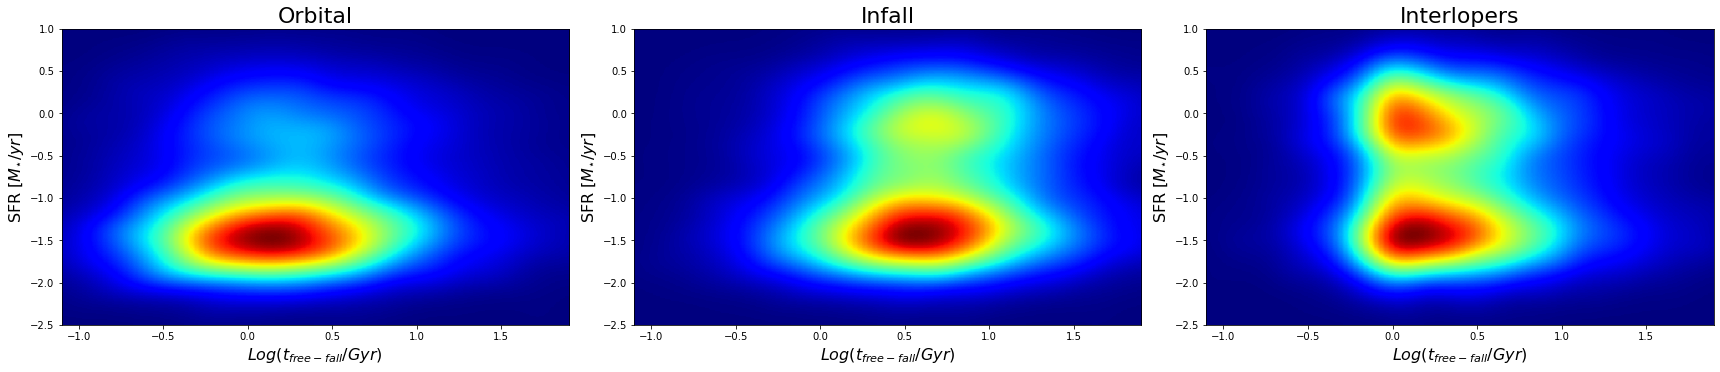

In [128]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRff(np.log10(t_infall),sfr,Po,ax=axis[0],title='Orbital')
SFRff(np.log10(t_infall),sfr,Pi,ax=axis[1],title='Infall')
SFRff(np.log10(t_infall),sfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_free_fall_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)

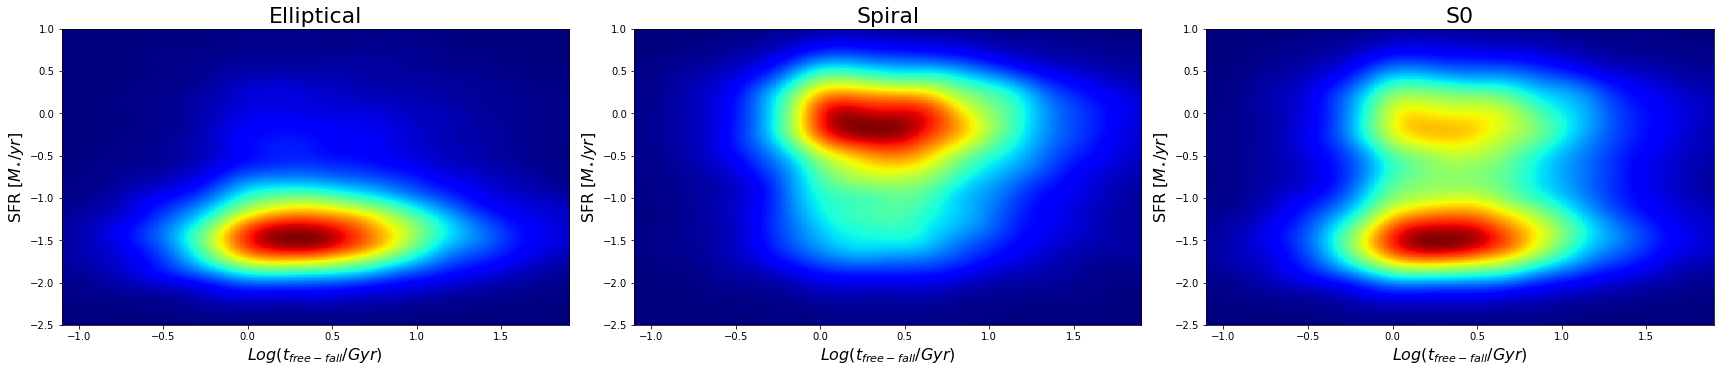

In [111]:
fig, axis = plt.subplots(1, 3, figsize=(24,5))
SFRff(np.log10(t_infall),sfr,Pell,ax=axis[0],title='Elliptical')
SFRff(np.log10(t_infall),sfr,Psp,ax=axis[1],title='Spiral')
SFRff(np.log10(t_infall),sfr,Ps0,ax=axis[2],title='S0')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/sfr_morphological_transformation_free_fall.png',facecolor='w', transparent=False,dpi=150)

## Morphological Type

In [120]:
morph_label = r'TType'

In [153]:
# grid
xmin, xmax = -3., 7.
x = np.linspace(xmin, xmax, 100)
y = np.linspace(ymin, ymax, 100)  # kde resolution
xx, yy = np.meshgrid(x, y)

def sSFRmorph(x1,x2,x3,xth=0.0,ax=None,title=None,ylabel=ssfr_label):
    f = get_kde(np.vstack([x1,x2]),weights=x3)
    
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    cfset = ax.contourf(xx, yy, f, cmap='jet')
    ax.imshow(np.rot90(f.T), cmap='jet', extent=[xmin, xmax, ymin, ymax], aspect=2.5)
    cset = ax.contour(xx, yy, f, colors='k')
    ax.clabel(cset, inline=1, fontsize=10)
    ax.set_xlabel(morph_label,fontsize=16)
    ax.set_ylabel(ylabel,fontsize=16)
    
    if title is not None:
        ax.set_title(title,fontsize=22)

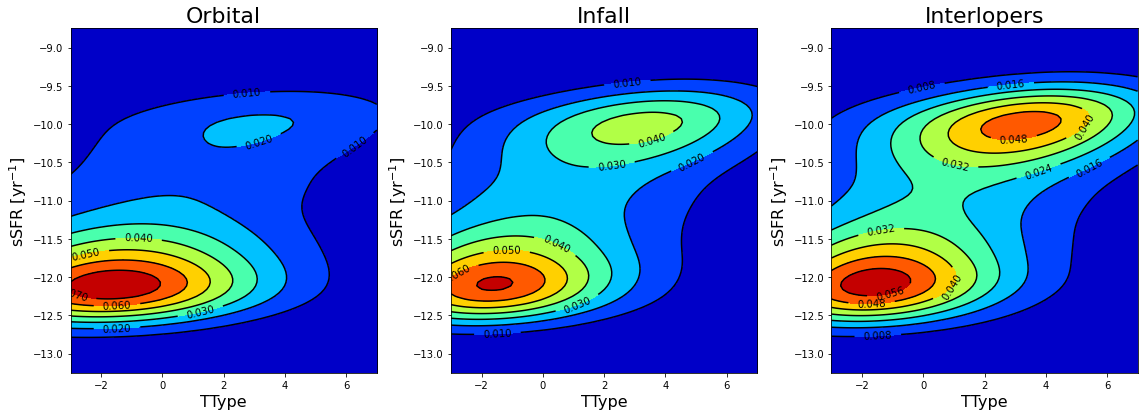

In [155]:
fig, axis = plt.subplots(1, 3, figsize=(16,6))
sSFRmorph(morph_type,ssfr,Po,ax=axis[0],title='Orbital')
sSFRmorph(morph_type,ssfr,Pi,ax=axis[1],title='Infall')
sSFRmorph(morph_type,ssfr,Pn,ax=axis[2],title='Interlopers')
fig.subplots_adjust(wspace=0.2,hspace=0.05)
fig.tight_layout()
fig.savefig('../plots/ssfr_morph_dynamical_classes.png',facecolor='w', transparent=False,dpi=150)